# MCB112  pset11
Yining Hua

### 1. reproduce Watson's K-means results
Modify the K-means clustering procedure you wrote for Wiggins' data so that it works in 2001 dimensions, not just 2. Run a reasonable number of iterations (20-100, or even better, test for convergence), starting from several different initializations; report the lowest total squared distance (best clustering) you find for K=8. It should be close to what Watson found using k = 8 clusters, where his clustering achieved a sum of the squared distance = 87378.2. He used the "fixed" K-means method from part 3 of hw05, with his data represented as log counts.



Below are week5's sample solution 1 with some modificaitons

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

use_log_dist = False
def sample_component(X):
    N, G   = np.shape(X)
    dmax   = np.amax(X, axis=0)
    dmin   = np.amin(X, axis=0)
    mu     = np.zeros(G)
    for g in range(G):
        mu[g] = np.random.uniform(dmin[g], dmax[g])
    return mu

def euclidean_dist(v1, v2):
    d = 0.
    for i in range(len(v1)):
        if use_log_dist:
            d += (np.log(v1[i]) - np.log(v2[i]))**2
        else:
            d += (v1[i] - v2[i])**2
    return np.sqrt(d)

def closest_centroid(x, centroids):
    K, dim = np.shape(centroids)
    best_k = 0
    best_dist = euclidean_dist(x, centroids[0])
    for k in range(1,K):
        dist = euclidean_dist(x, centroids[k])
        if dist < best_dist:
            best_k    = k
            best_dist = dist
    return best_k, best_dist

def euclidean_dist(v1, v2):
    d = 0.
    for i in range(len(v1)):
        if use_log_dist:
            d += (np.log(v1[i]) - np.log(v2[i]))**2
        else:
            d += (v1[i] - v2[i])**2
    return np.sqrt(d)

def closest_centroid(x, centroids):
    K, dim = np.shape(centroids)
    best_k = 0
    best_dist = euclidean_dist(x, centroids[0])
    for k in range(1,K):
        dist = euclidean_dist(x, centroids[k])
        if dist < best_dist:
            best_k    = k
            best_dist = dist
    return best_k, best_dist

def assign_kmeans(X, centroids):
    K, dim      = np.shape(centroids)
    N           = len(X)
    assignments = np.zeros(N).astype(int)
    tot_sqdist  = 0
    for i,x in enumerate(X):
        assignments[i], di = closest_centroid(x, centroids)
        tot_sqdist += di**2
    return assignments, tot_sqdist

def update_kmeans(X, assignments, K):
    N, G    = np.shape(X)              
    
    centroids = np.zeros((K,G))        
    counts    = np.zeros(K)
    for i in range(N):
        counts[assignments[i]] += 1
        for g in range(G):
            centroids[assignments[i], g] += X[i][g]

    for k in range(K):
        if counts[k] > 0:                                      # In a K-means implementation we have to watch out for the case
            centroids[k] = np.divide(centroids[k], counts[k])  # where a centroid gets no assigned points. Avoid dividing by zero.
        else:                                                  # One strategy is to leave the centroid unchanged. 
            centroids[k] = sample_component(X)                 # Here, instead, we reinitialize it randomly.

    Z = np.sum(counts)
    counts = np.divide(counts, Z)
    return centroids, counts

def diff_assignments(a1, a2):
    N     = len(a1)
    ndiff = 0
    for i in range(N):
        if a1[i] != a2[i]: 
            ndiff += 1
    return ndiff

def kmeans(X, K, T=np.zeros(0)):
    N, G = np.shape(X)
    
    if len(T) > 0:
        centroids, qp = update_kmeans(X, T, K)
    else:
        centroids = np.zeros((K,G))
        for k in range(K):
            centroids[k] = sample_component(X)
    
    iteration = 0
    while True:
        assignments, tot_sqdist = assign_kmeans(X, centroids)
        if iteration >= 1:
            ndiff = diff_assignments(assignments, old_assignments)
            if ndiff <= threshold: 
                print("Meeting threshold %.2f at iteration %i with %.2f"%(threshold, iteration, tot_sqdist))
                break
        centroids, kp   = update_kmeans(X, assignments, K)
        old_assignments = assignments
        iteration      += 1

    kp = np.zeros(K)
    for i in range(N):
        kp[assignments[i]] += 1
    kp = np.divide(kp, N)

    return kp, centroids, assignments, tot_sqdist

In [76]:
df = pd.read_table("w11-data.tbl.txt", delim_whitespace=True)
dat = df.to_numpy()
dat_log = np.log(dat + 1)

In [78]:
import tqdm
K = 8
n_run = 20
min_sqdist = float("inf")
best_run = float("inf")
threshold = 0.01

for r in tqdm.tqdm(range(n_run)):
    np.random.seed(r)
    kp, centroids, assignmnets, total_sqdist = kmeans(dat_log, K)
    if total_sqdist < min_sqdist:
        min_sqdist  = total_sqdist
        best_run    = r
print("The best run was %i with min sqrd distance of %.2f"%(best_run, min_sqdist))

  5%|▌         | 1/20 [00:23<07:30, 23.71s/it]

Meeting threshold 0.01 at iteration 13 with 88340.57


 10%|█         | 2/20 [00:39<05:37, 18.76s/it]

Meeting threshold 0.01 at iteration 8 with 88107.88


 15%|█▌        | 3/20 [00:49<04:11, 14.82s/it]

Meeting threshold 0.01 at iteration 5 with 88397.79


 20%|██        | 4/20 [01:07<04:21, 16.35s/it]

Meeting threshold 0.01 at iteration 10 with 88118.83


 25%|██▌       | 5/20 [01:21<03:50, 15.37s/it]

Meeting threshold 0.01 at iteration 7 with 88631.28


 30%|███       | 6/20 [01:30<03:02, 13.07s/it]

Meeting threshold 0.01 at iteration 4 with 88946.88


 35%|███▌      | 7/20 [01:47<03:06, 14.38s/it]

Meeting threshold 0.01 at iteration 9 with 87699.89


 40%|████      | 8/20 [02:17<03:55, 19.60s/it]

Meeting threshold 0.01 at iteration 17 with 88019.81


 45%|████▌     | 9/20 [02:29<03:09, 17.18s/it]

Meeting threshold 0.01 at iteration 6 with 89634.83


 50%|█████     | 10/20 [02:46<02:51, 17.16s/it]

Meeting threshold 0.01 at iteration 9 with 88476.61


 55%|█████▌    | 11/20 [02:57<02:15, 15.02s/it]

Meeting threshold 0.01 at iteration 5 with 88795.25


 60%|██████    | 12/20 [03:10<01:56, 14.59s/it]

Meeting threshold 0.01 at iteration 7 with 89428.50


 65%|██████▌   | 13/20 [03:24<01:40, 14.31s/it]

Meeting threshold 0.01 at iteration 7 with 88476.83


 70%|███████   | 14/20 [03:37<01:24, 14.11s/it]

Meeting threshold 0.01 at iteration 7 with 88573.33


 75%|███████▌  | 15/20 [03:44<00:59, 11.88s/it]

Meeting threshold 0.01 at iteration 3 with 89002.24


 80%|████████  | 16/20 [04:04<00:56, 14.13s/it]

Meeting threshold 0.01 at iteration 10 with 87856.95


 85%|████████▌ | 17/20 [04:18<00:42, 14.16s/it]

Meeting threshold 0.01 at iteration 7 with 87378.24


 90%|█████████ | 18/20 [04:37<00:31, 15.65s/it]

Meeting threshold 0.01 at iteration 10 with 88661.93


 95%|█████████▌| 19/20 [04:47<00:13, 13.99s/it]

Meeting threshold 0.01 at iteration 5 with 87893.65


100%|██████████| 20/20 [05:00<00:00, 15.02s/it]

Meeting threshold 0.01 at iteration 6 with 87606.41
The best run was 16 with min sqrd distance of 87378.24


- I'm setting the threshold to be 0.01 because I tested 0.001 and they pretty much worked equally good. 
- We see that the minimum squared distant occurredat iteration 16, with a minimum distance of 87378.23850, very similar to the what Watsons reported. 

In [79]:
# reload the best model
np.random.seed(16)
kp, centroids, assignmnets, total_sqdist = kmeans(dat_log, K)
total_sqdist

Meeting threshold 0.01 at iteration 7 with 87378.24


87378.23849909396

In [85]:
unique_cluster, counts = np.unique(assignmnets, return_counts = True)
counts_sum = np.cumsum(counts)

In [81]:
dat_df = pd.DataFrame(dat_log)
dat_df["cluster"] = assignmnets
dat_df = dat_df.sort_values('cluster')
dat_df[:3]

,0,1,2,3,4,5,6,7,8,9,...,1992,1993,1994,1995,1996,1997,1998,1999,2000,cluster
0,5.332719,5.393628,6.278521,5.568345,5.683580,5.537334,6.794587,5.370638,4.962845,5.123964,...,4.553877,6.270988,5.010635,6.556778,6.675823,5.141664,5.278115,6.907755,6.226537,0
39,5.713733,5.991465,6.729824,5.720312,5.556828,6.186209,6.968850,5.707110,3.784190,5.697093,...,5.337538,6.551080,5.916202,6.941190,5.231109,5.398163,4.997212,6.992096,6.566672,0
77,5.379897,6.335054,5.739793,6.614726,5.758902,5.755742,6.629363,6.129050,5.402677,5.627621,...,4.595120,6.126869,5.945421,6.224558,6.514713,5.888878,5.141664,7.706163,6.447306,0


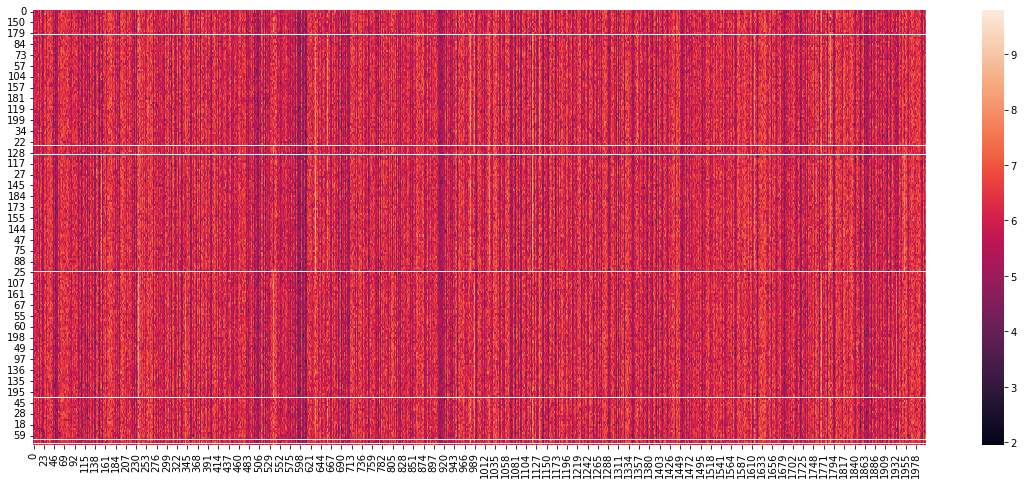

In [82]:
x_labels = [i for i in range(0, 2000, 500)]
y_labels = [i for i in range(0, 200, 50)]

# plot heatmap
fig, ax = plt.subplots(figsize = (20, 8))
sns.heatmap(dat_df.T[:2001].T)

x_min, x_max = plt.xlim()
for s in counts_sum:
    ax.hlines(y = s, xmin = x_min, xmax = x_max, color = 'white', lw = 1)

We can sort of see that the kmeans successfully re-produced Watson's results from the heatmap above

## 2. reduce the dimensionality
Write a Python function that uses singular value decomposition to find the principal components of the data set.

Plot all 200 cells in 2D expression space using their projections onto the first two principal axes.

Was Watson right to expect 8 clusters? Plot the eigenvalues for each component, and justify why you're pretty sure it would be hard to find any other clusters in the data set. The eigenvalues from a simulated negative control data set, where there were no cell types and no correlations between any of the genes, should factor into your answer.

Based on the eigenvector loadings, how many genes appear to influence cell type identity? Explain.



Text(0, 0.5, 'PC2')

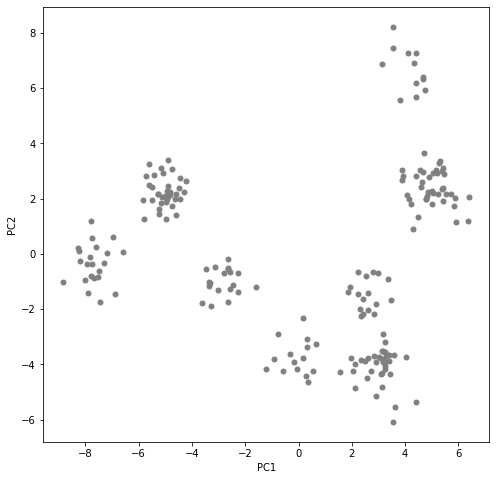

In [111]:
N = dat_log.shape[0]
## code borrowed from the section 
def PCA(data):
    X_centered_data = data - np.mean(data, axis = 0)
    U, S, W_t     = np.linalg.svd(X_centered_data)
    W             = W_t.T
    PCs           = np.dot(X_centered_data, W)
    return PCs, U, S, W, W_t

PCs, U, S, W, W_t = PCA(dat_log)

fig2, ax2 = plt.subplots(figsize = (8, 8))
colormap = ['xkcd:orange', 'xkcd:olive', 'xkcd:azure',    'xkcd:rose', 'xkcd:mustard', 
                'xkcd:peach',  'xkcd:turquoise', 'xkcd:lavender', 'xkcd:rust', 'xkcd:red']

for i in range(N):
    ax2.plot(PCs[:, :2][i, 0], PCs[:, :2][i, 1], 'o', c="gray", ms=5)
    ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")

In [84]:
def calculate_eigenvalue(S, N):
    """[calculate the eigenvalue based on SVD]

    Args:
        S ([type]): [description]

    Returns:
        eigen_value ([list]): [A list to store the eigenvalues]
    """
    eigenval = []
    for i in range(N):
        eigenval.append(S[i]**2 / (N-1))

    return eigenval

eigenvalues = calculate_eigenvalue(S, N)

Text(0, 0.5, 'Variance Explained')

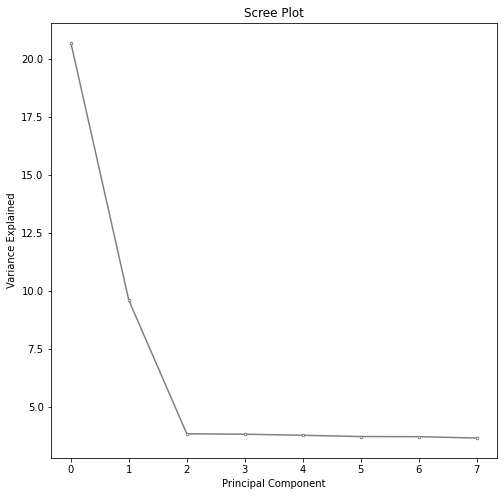

In [113]:
fig3, ax3 = plt.subplots(figsize = (8, 8))
ax3.plot([i for i in range(8)], eigenvalues[:8], '.-', c='gray', mfc='w', ms=5)

ax3.set_title("Scree Plot")
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Variance Explained')

Text(0, 0.5, 'PC2')

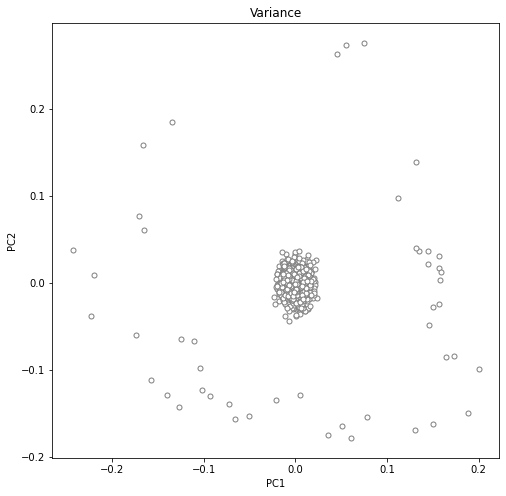

In [114]:
fig4, ax4 = plt.subplots(figsize = (8, 8))
ax4.plot(W[:,:2][:,0], W[:,:2][:,1], 'o', c='gray', mfc = 'w', ms=5)
ax4.set_title("Variance")
ax4.set_xlabel('PC1')
ax4.set_ylabel('PC2')

Text(0, 0.5, 'total variance')

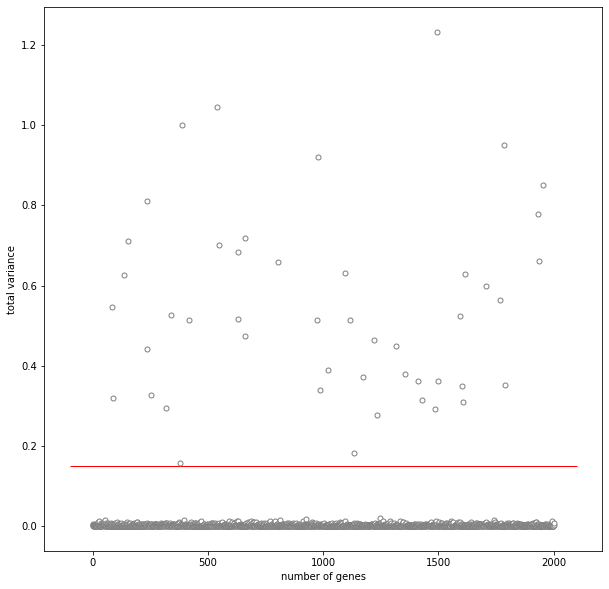

In [115]:
total_variance_PC2 = np.sum(np.dot(np.square(W[:,:2]), np.diag(eigenvalues[0:2])), axis = 1)
fig5, ax5 = plt.subplots(figsize = (10, 10))
ax5.plot(total_variance_PC2, 'o', c='gray', mfc = 'w', ms=5)
x_min_5, x_max_5 = plt.xlim()
ax5.hlines(y = 0.15, xmin = x_min_5, xmax = x_max_5, color = 'red', lw = 1)
ax5.set_xlabel('number of genes')
ax5.set_ylabel('total variance')


So yes, Watson was right to expect 8 clusters. As we can see from the PCA result, there are 8 spreaded clusters. Also the eigenvalues(variance) are clustered at 0 for the 2D PCA results. The Scree plot also show that the first 2 components captured most of the variances that we can capture using PCA(D=2) (so does the final total variance plot suggest). Therefore it's unlikely that there's gonna be more than 8 clusters.


In [104]:
significant_genes = [i for i in total_variance_PC2 if i > 0.15]
print("We have %i genes that might influence cell type identity."%len(significant_genes))

We have 47 genes that might influence cell type identity.


## 3. check the K
Plot the data in 2D principal component space, and color each point according to the cluster identities from part 1. You should find the K-means is missing the mark.

Offer an explanation of what might be going wrong, and find a way to cluster so that each cell appears properly assigned in PC space.

Text(0, 0.5, 'PC2')

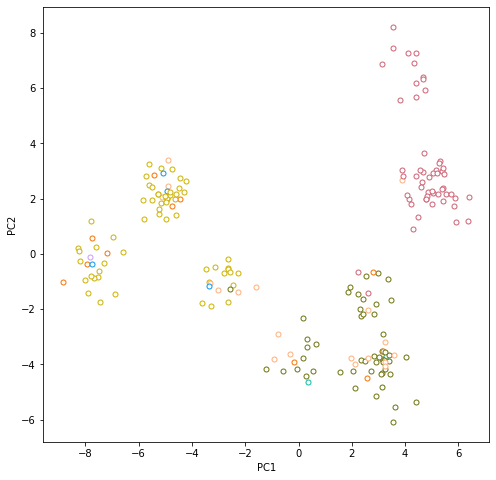

In [140]:
fig2, ax2 = plt.subplots(figsize = (8, 8))
# We can assign colors to up to Q=10 components. If you want more, add more.
colormap = ['xkcd:orange', 'xkcd:olive', 'xkcd:azure',    'xkcd:rose', 'xkcd:mustard', 
                'xkcd:peach',  'xkcd:turquoise', 'xkcd:lavender', 'xkcd:rust', 'xkcd:red']
for i in range(N):
    ax2.plot(PCs[:, :2][i, 0], PCs[:, :2][i, 1], 'o', mec = colormap[assignmnets[i]%8], mfc='w', ms=5)
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")

There's definitely too much noise sneaked in our Kmeans clustering of the 2001-dimension data. Also we just see that amongst the 2001 genes only 47 of them seem to be actually influencing cell type identity. That means the remaining 2001-47=1954 might just be noise. To fix this, we can laverage the PCA result by running Kmeans on it.

In [141]:
K_cluster    = 8
num_run      = 20
min_sqdist_PCA  = float("inf")
best_run_PCA     = float("inf")

for r in range(num_run):
    np.random.seed(r)
    kp_PCA, centroids_PCA, assignments_PCA, total_sqdist_PCA = kmeans(PCs[:, :2], K_cluster)
    if total_sqdist_PCA < min_sqdist_PCA:
        min_sqdist_PCA  = total_sqdist_PCA
        best_run_PCA    = r

print("The best run was %i with min sqrd distance of %.2f"%(best_run_PCA, min_sqdist_PCA))

Meeting threshold 0.01 at iteration 9 with 210.86
Meeting threshold 0.01 at iteration 9 with 129.71
Meeting threshold 0.01 at iteration 6 with 208.83
Meeting threshold 0.01 at iteration 5 with 302.07
Meeting threshold 0.01 at iteration 15 with 215.51
Meeting threshold 0.01 at iteration 6 with 300.88
Meeting threshold 0.01 at iteration 5 with 221.56
Meeting threshold 0.01 at iteration 12 with 219.96
Meeting threshold 0.01 at iteration 7 with 291.87
Meeting threshold 0.01 at iteration 5 with 205.62
Meeting threshold 0.01 at iteration 7 with 215.51
Meeting threshold 0.01 at iteration 7 with 208.61
Meeting threshold 0.01 at iteration 7 with 304.68
Meeting threshold 0.01 at iteration 5 with 294.67
Meeting threshold 0.01 at iteration 10 with 129.71
Meeting threshold 0.01 at iteration 5 with 219.18
Meeting threshold 0.01 at iteration 4 with 205.86
Meeting threshold 0.01 at iteration 11 with 221.19
Meeting threshold 0.01 at iteration 5 with 129.71
Meeting threshold 0.01 at iteration 7 with 295

Meeting threshold 0.01 at iteration 9 with 129.71


Text(0.5, 1.0, 'Kmeans using PCA')

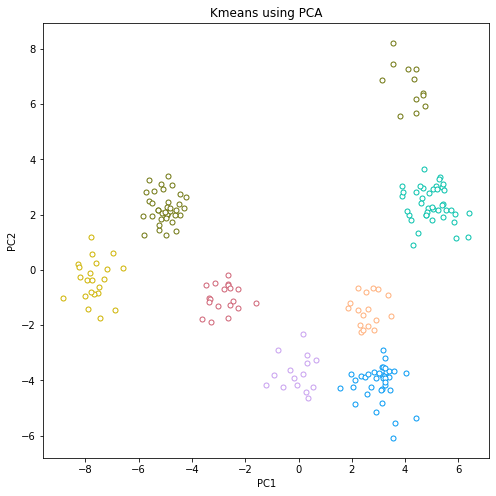

In [155]:
np.random.seed(1)
kp_PCA, centroids_PCA, assignments_PCA, total_sqdist_PCA = kmeans(PCs[:, :2], K_cluster)

fig6, ax6 = plt.subplots(figsize = (8, 8))
colormap = ['xkcd:orange', 'xkcd:olive', 'xkcd:mustard', 'xkcd:azure',  'xkcd:rose',  
                'xkcd:peach',  'xkcd:turquoise', 'xkcd:lavender', 'xkcd:rust', 'xkcd:red']
for i in range(N):
    ax6.plot(PCs[:, :2][i, 0], PCs[:, :2][i, 1], 'o', mec = colormap[assignments_PCA[i]%7+1], mfc='w', ms=5)  ## assignments_PCA[i]%7+1 because 2 similar colors were assigned near to each other in assignments_PCA[i]%8

ax6.set_xlabel("PC1")
ax6.set_ylabel("PC2")
ax6.set_title("Kmeans using PCA")

### 4. reconstruct the expression patterns
Reconstruct the original data set using only the projected data and eigenvectors for the first 2 principal components. Visualize the data using a heat map. Do the clusters now look more obvious? Why or why not?

In [156]:
new_eigenvectors = U[:, :2] @ np.diag(S[:2]) @ W_t[:2, :]
new_eigenvectors_df = pd.DataFrame(new_eigenvectors)
new_eigenvectors_df["cluster"] = assignments_PCA
new_eigenvectors_df = new_eigenvectors_df.sort_values('cluster')

In [157]:
def plot_heatmap(new_eigenvectors_df):
    unique_cluster, counts = np.unique(new_eigenvectors_df.cluster, return_counts = True)
    cumulative_sum_pca = np.cumsum(counts)

    x_labels = [i for i in range(0, 2000, 500)]
    y_labels = [i for i in range(0, 200, 50)]

    # plot heatmap
    fig, ax = plt.subplots(figsize = (20, 8))
    sns.heatmap(new_eigenvectors_df.T[:2001].T)

    x_min, x_max = plt.xlim()
    for s in cumulative_sum_pca:
        ax.hlines(y = s, xmin = x_min, xmax = x_max, color = 'white', lw = 1)

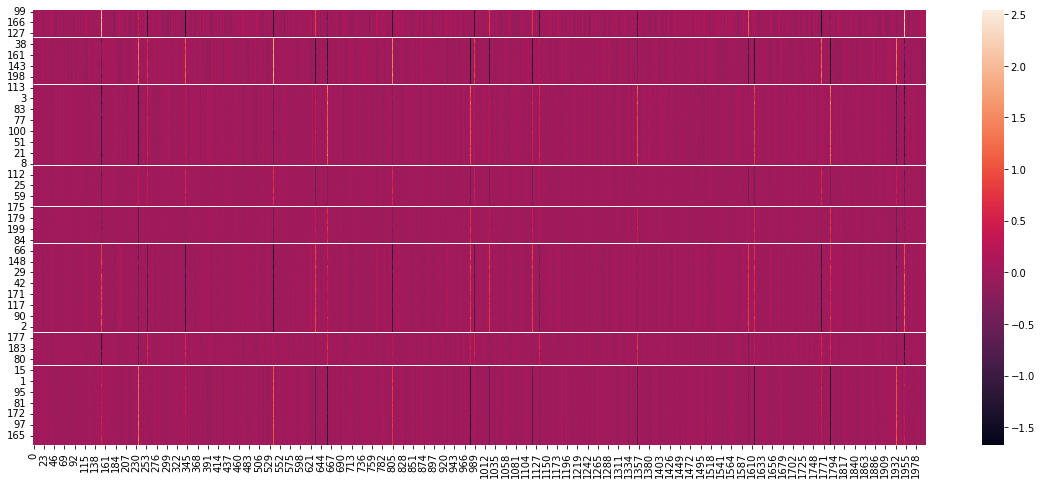

In [159]:
plot_heatmap(new_eigenvectors_df)

Yes it definitely seems more obvious. We can see that there are 8 clusters along the y axis. We can also see that for the significant contributor genes, different genes have different expressions within clusters. For the non-significant ones, their eigenvectors are all about 0. A zoom-in of the 47 significant genes could be drawn to better visualize the clusters, but since this one is obvious enough, I'll leave that as a future improvement.